In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'c:\Users\omarn\OneDrive\سطح المكتب\New folder\laptops.csv')

In [3]:
print(df.head())

                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

In [4]:
print(df.shape)

(2160, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB
None


In [7]:
print(df.isnull().sum())

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


In [ ]:
#CLEANING PROCESS

In [8]:
df = df.dropna()

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64


In [10]:
print(df.columns)

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')


In [11]:
df.loc[:, 'Final Price'] = df['Final Price'].fillna(df['Final Price'].median())

In [12]:
df['Brand'].fillna('Unknown', inplace=True)

In [14]:
df['Final Price'] = df['Final Price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df['Brand'] = df['Brand'].astype('category')

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Brand'] = label_encoder.fit_transform(df['Brand'])

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['RAM', 'Final Price']] = scaler.fit_transform(df[['RAM', 'Final Price']])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['RAM', 'Final Price']] = scaler.fit_transform(df[['RAM', 'Final Price']])

In [19]:
print(df.head())
print(df.info())
print(df.describe())

                                               Laptop Status  Brand  \
3   MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New      9   
5   MSI Crosshair 17 C12VF-264XES Intel Core i7-12...    New      9   
9   HP Victus 16-d1038ns Intel Core i7-12700H/16GB...    New      6   
11  MSI Thin GF63 12VE-021XES Intel Core i7-12650H...    New      9   
12  ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...    New      2   

        Model            CPU       RAM  Storage Storage type       GPU  \
3      Katana  Intel Core i7  0.066667     1000          SSD  RTX 3050   
5   Crosshair  Intel Core i7  0.200000     1000          SSD  RTX 4060   
9      Victus  Intel Core i7  0.066667      512          SSD  RTX 3050   
11       Thin  Intel Core i7  0.066667     1000          SSD  RTX 4050   
12        ROG    AMD Ryzen 7  0.066667      512          SSD  RTX 3050   

    Screen Touch  Final Price  
3     15.6    No     0.108111  
5     17.3    No     0.183041  
9     16.1    No     0.100618  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


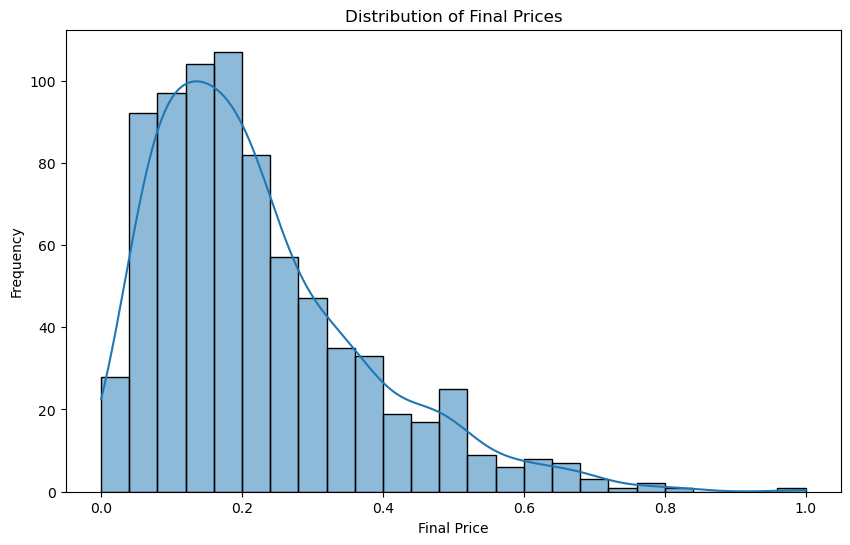

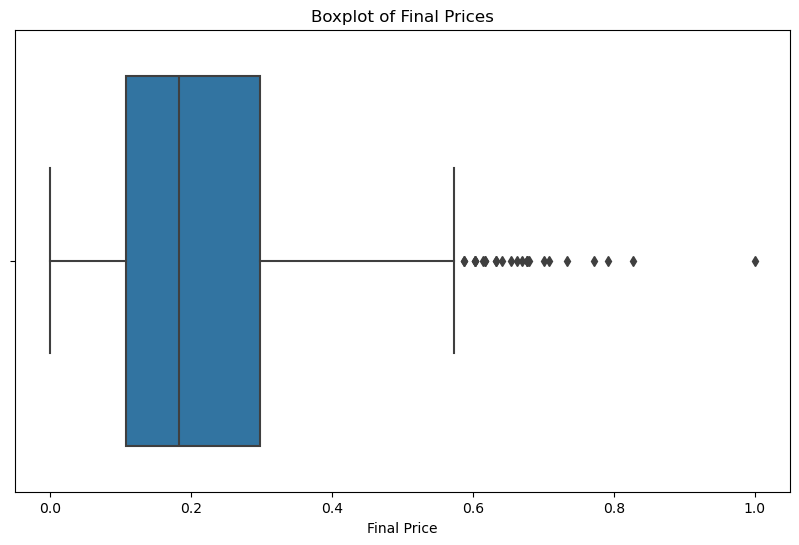

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
df['Final Price'] = np.where(df['Final Price'] == np.inf,np.nan, df['Final Price'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Final Price'], kde=True)
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Final Price'])
plt.title('Boxplot of Final Prices')
plt.show()

In [25]:
numeric_df = df.select_dtypes(include=[float, int])

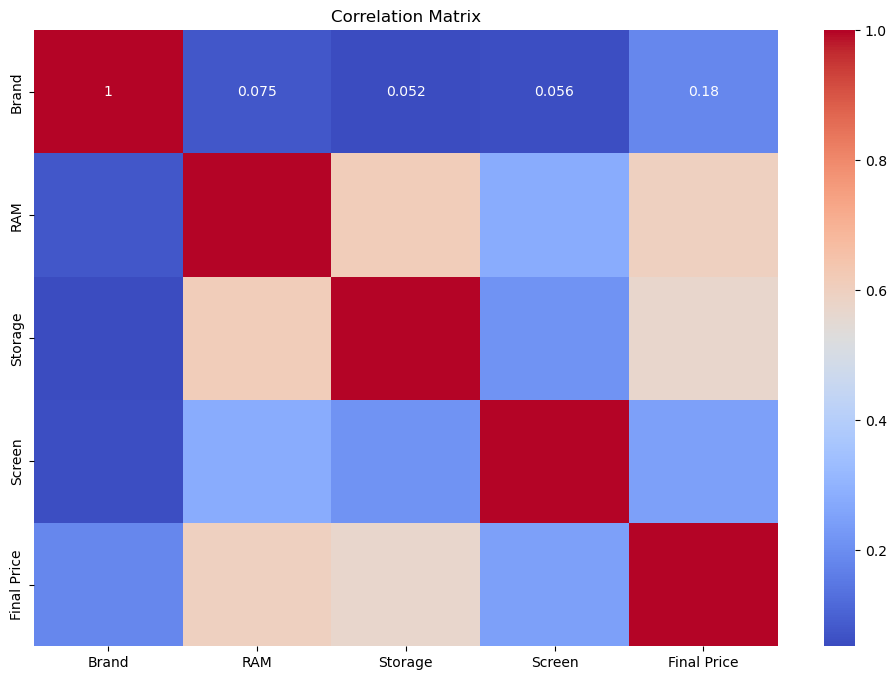

In [26]:
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

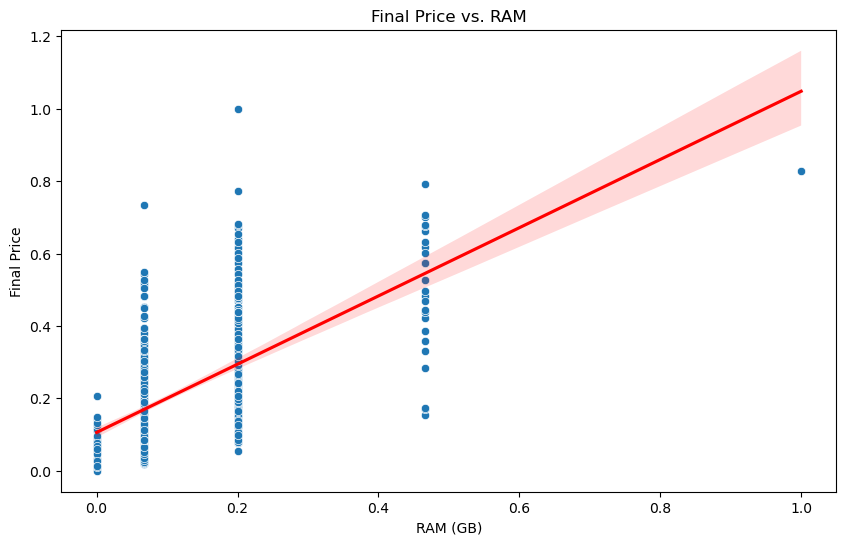

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Final Price', data=df)
sns.regplot(x='RAM', y='Final Price', data=df, scatter=False, color='red')
plt.title('Final Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Final Price')
plt.show()

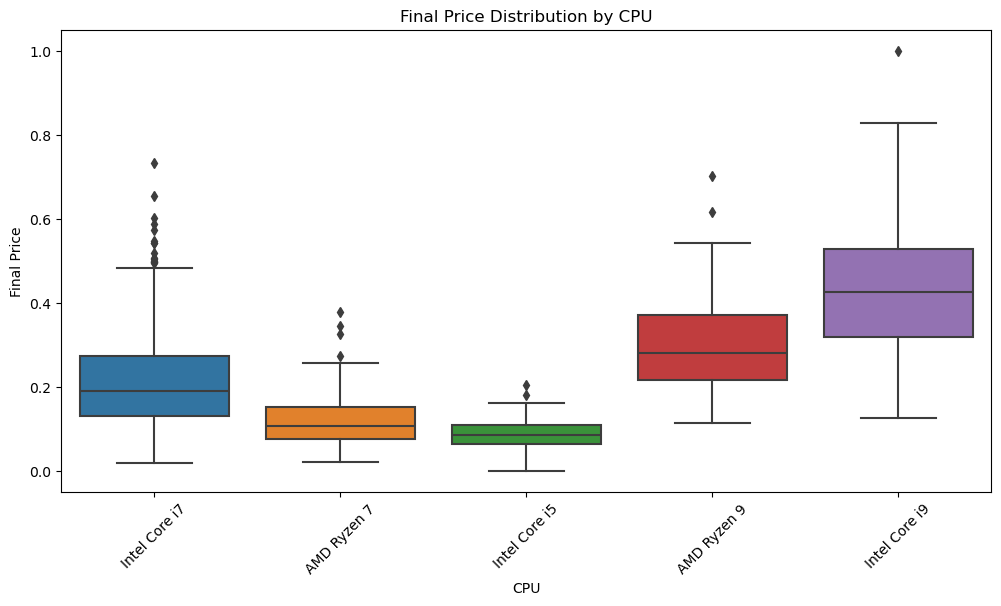

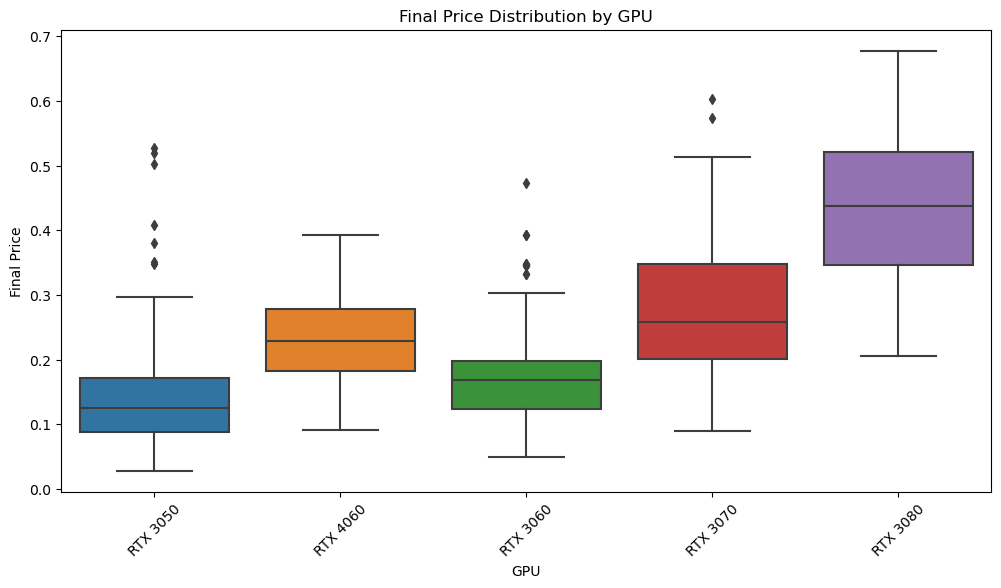

In [28]:
# Example: Focusing on a few common CPU models
cpu_models = df['CPU'].value_counts().index[:5]
filtered_df = df[df['CPU'].isin(cpu_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='CPU', y='Final Price', data=filtered_df)
plt.title('Final Price Distribution by CPU')
plt.xticks(rotation=45)
plt.show()

# Example: Focusing on a few common GPU models
gpu_models = df['GPU'].value_counts().index[:5]
filtered_df = df[df['GPU'].isin(gpu_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='GPU', y='Final Price', data=filtered_df)
plt.title('Final Price Distribution by GPU')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.columns = df.columns.str.strip()

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Final Price', axis=1)
y = df['Final Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_features = ['Brand', 'Model', 'CPU', 'GPU', 'Storage type']
numerical_features = ['RAM', 'Screen']

# Create transformers for each type of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the preprocessing pipeline to the training and test data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.005272839108778312
R^2 Score: 0.794226668055056


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")


Random Forest Mean Squared Error: 0.007867999828533574
Random Forest R^2 Score: 0.6929501342523003


In [38]:
from sklearn.model_selection import GridSearchCV

# Example of Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_preprocessed, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")


Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Score: 0.0061815253680585925


In [42]:
#REUSING THE MODEL WIITH BEST PARAMETERS

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a new Random Forest model with the best parameters
rf_best_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

# Train the model on the preprocessed training data
rf_best_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test data
y_pred_best = rf_best_model.predict(X_test_preprocessed)

# Evaluate the model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error with best parameters: {mse_best}")
print(f"R^2 Score with best parameters: {r2_best}")

Mean Squared Error with best parameters: 0.007806305812670357
R^2 Score with best parameters: 0.6953577524146114
